In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

path = '../../../project_data/fer2013/icml_face_data.csv'
df = pd.read_csv(path)

# creating a dataframe that only contains training data
train = df[df[' Usage']=='Training'].copy()
# dropping the usage column
train.drop([' Usage'], axis = 1, inplace = True)


# creating the test dataframe, dropping the usage column and reseting the index
test = df[df[' Usage']=='PrivateTest'].copy()
test.drop([' Usage'], axis = 1, inplace = True)
test.reset_index(inplace = True, drop = True)

# creating the validation dataframe and dropping the usage column and reseting the index
validation = df[df[' Usage']=='PublicTest'].copy()
validation.drop([' Usage'], axis = 1, inplace = True)
validation.reset_index(inplace=True, drop = True)


def get_pixels_and_scale(data):
    '''
    Function for extracting pixel values from the pixel column and scaling them between 0 and 1
    
    get values from the column|
    split on the whitespace
    convert to float16 datatype
    save as as numpy array
    scale the values between 0 and 1
    '''
    
    img_array = np.array(data.split(' '), dtype = 'float16')
    img_array = img_array / 255.0
    
    return img_array

def reshape_images(data):
    '''
    reshape pixels column into desired format
    return a numpy array
    '''

    reshaped_array = np.reshape(data[' pixels'].to_list(),(data.shape[0],48,48,1))
    
    return reshaped_array

def plot_random_images(dataset): 
    if np.array_equal(dataset, train_images):
        labels = train_labels
    else:
        labels = test_labels

    # Checking 25 random images from the train set across all classes
    plt.figure(figsize=(12,12))
    for ind, img_num in enumerate(np.random.randint(1,len(dataset),size=25)):
        plt.subplot(5,5,ind+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(dataset[img_num], cmap='gray')
        plt.xlabel(emotions[labels[img_num]])
    plt.show()
    
def plot_model_accuracy(fitted_model):
    '''
    Function visualizing comparison of 
    training and validaton loss and accuracy
    
    '''
    
    fig , ax = plt.subplots(1,2)
    train_acc = fitted_model.history['accuracy']
    train_loss = fitted_model.history['loss']
    fig.set_size_inches(15,4)

    ax[0].plot(fitted_model.history['accuracy'])
    ax[0].plot(fitted_model.history['val_accuracy'])
    ax[0].set_title('Training vs Validation Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Training', 'Validation'], loc='lower right')

    ax[1].plot(fitted_model.history['loss'])
    ax[1].plot(fitted_model.history['val_loss'])
    ax[1].set_title('Training vs Validation Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Training', 'Validation'], loc='lower left')

    plt.show()
    

# extracting pixel values from the pixel column and scaling them between 0 and 1    
train[' pixels'] = train[' pixels'].apply(get_pixels_and_scale)   
test[' pixels'] = test[' pixels'].apply(get_pixels_and_scale)
validation[' pixels'] = validation[' pixels'].apply(get_pixels_and_scale)

# reshaping pixels column into a desired format and getting a numpy array
train_images = reshape_images(train)
test_images = reshape_images(test)
validation_images = reshape_images(validation)


# getting the labels
train_labels = train['emotion']
test_labels = test['emotion']
validation_labels = validation['emotion']

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)
print(validation_images.shape, validation_labels.shape)

(28709, 48, 48, 1) (28709,)
(3589, 48, 48, 1) (3589,)
(3589, 48, 48, 1) (3589,)


In [2]:
# np.savez('../../../project_data/test.npz', test_images=test_images, test_labels=test_labels)

In [3]:
# np.savez('../../../project_data/train.npz', train_images, train_labels)
# np.savez('../../../project_data/test.npz', test_images, test_labels)
# np.savez('../../../project_data/validation.npz', validation_images, validation_labels)

In [4]:
import tensorflow as tf

# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization, Flatten

print(tf.__version__)

2.8.0


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,
                           (3,3), 
                           activation='relu', 
                           input_shape=(48, 48, 1),
                           padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [4]:
from tensorflow.keras.optimizers import RMSprop

model.compile(#loss='categorical_crossentropy',
              loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [6]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks=myCallback()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'   
    #featurewise_center=True,
    #featurewise_std_normalization=True,
)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
train_datagen.fit(train_images)

train_datagen = train_datagen.flow(train_images, train_labels, batch_size=128)
valid_datagen = ImageDataGenerator()
valid_datagen = valid_datagen.flow(validation_images, validation_labels, batch_size=16)

In [8]:
history = model.fit(
      train_datagen,
      validation_data = valid_datagen,  
      epochs=100,
      steps_per_epoch=224,
      validation_steps=224,
      verbose=1,
      callbacks=[callbacks])


# # fits the model on batches with real-time data augmentation:
# model.fit(datagen.flow(x_train, y_train, batch_size=32,
#          subset='training'),
#          validation_data=datagen.flow(x_train, y_train,
#          batch_size=8, subset='validation'),
#          steps_per_epoch=len(x_train) / 32, epochs=epochs)

# train_loader = train_datagen.flow(train_imgs_new, train_lbls, batch_size=64)

Epoch 1/100


2022-05-14 08:39:16.599593: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-14 08:39:16.890706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


223/224 [============================>.] - ETA: 0s - loss: 1.8249 - accuracy: 0.2498

2022-05-14 08:39:25.139768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


224/224 [==============================] - 10s 41ms/step - loss: 1.8248 - accuracy: 0.2497 - val_loss: 1.8139 - val_accuracy: 0.2497
Epoch 2/100
224/224 [==============================] - 9s 40ms/step - loss: 1.8095 - accuracy: 0.2536 - val_loss: 1.8065 - val_accuracy: 0.2642
Epoch 3/100
224/224 [==============================] - 9s 40ms/step - loss: 1.7984 - accuracy: 0.2534 - val_loss: 1.7892 - val_accuracy: 0.2525
Epoch 4/100
224/224 [==============================] - 9s 40ms/step - loss: 1.7919 - accuracy: 0.2550 - val_loss: 1.7781 - val_accuracy: 0.2612
Epoch 5/100
224/224 [==============================] - 9s 40ms/step - loss: 1.7888 - accuracy: 0.2525 - val_loss: 1.7699 - val_accuracy: 0.2564
Epoch 6/100
224/224 [==============================] - 9s 40ms/step - loss: 1.7823 - accuracy: 0.2551 - val_loss: 1.7653 - val_accuracy: 0.2676
Epoch 7/100
224/224 [==============================] - 9s 41ms/step - loss: 1.7758 - accuracy: 0.2601 - val_loss: 1.7551 - val_accuracy: 0.2882
Epo

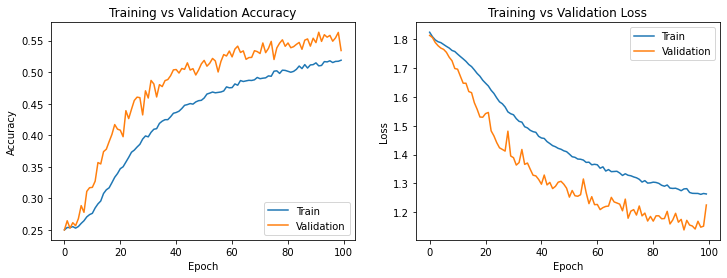

In [9]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='lower right')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [11]:
model.save_weights('../../../project_data/augmentation_100.h5')

In [12]:
history = model.fit(
      train_datagen,
      validation_data = valid_datagen,  
      epochs=400,
      steps_per_epoch=224,
      validation_steps=224,
      verbose=1,
      callbacks=[callbacks])

Epoch 1/400
224/224 [==============================] - 9s 41ms/step - loss: 1.2592 - accuracy: 0.5175 - val_loss: 1.1416 - val_accuracy: 0.5681
Epoch 2/400
224/224 [==============================] - 9s 40ms/step - loss: 1.2570 - accuracy: 0.5221 - val_loss: 1.1447 - val_accuracy: 0.5611
Epoch 3/400
224/224 [==============================] - 9s 40ms/step - loss: 1.2559 - accuracy: 0.5217 - val_loss: 1.1443 - val_accuracy: 0.5622
Epoch 4/400
224/224 [==============================] - 9s 40ms/step - loss: 1.2602 - accuracy: 0.5221 - val_loss: 1.1560 - val_accuracy: 0.5516
Epoch 5/400
224/224 [==============================] - 9s 40ms/step - loss: 1.2468 - accuracy: 0.5221 - val_loss: 1.1270 - val_accuracy: 0.5597
Epoch 6/400
224/224 [==============================] - 9s 40ms/step - loss: 1.2489 - accuracy: 0.5245 - val_loss: 1.1865 - val_accuracy: 0.5441
Epoch 7/400
224/224 [==============================] - 9s 40ms/step - loss: 1.2490 - accuracy: 0.5233 - val_loss: 1.1913 - val_accuracy:

Epoch 56/400
224/224 [==============================] - 9s 40ms/step - loss: 1.1900 - accuracy: 0.5468 - val_loss: 1.1101 - val_accuracy: 0.5795
Epoch 57/400
224/224 [==============================] - 9s 40ms/step - loss: 1.1875 - accuracy: 0.5476 - val_loss: 1.1093 - val_accuracy: 0.5843
Epoch 58/400
224/224 [==============================] - 9s 40ms/step - loss: 1.1898 - accuracy: 0.5479 - val_loss: 1.0940 - val_accuracy: 0.5831
Epoch 59/400
224/224 [==============================] - 9s 40ms/step - loss: 1.1881 - accuracy: 0.5489 - val_loss: 1.1127 - val_accuracy: 0.5773
Epoch 60/400
224/224 [==============================] - 9s 40ms/step - loss: 1.1875 - accuracy: 0.5505 - val_loss: 1.0976 - val_accuracy: 0.5831
Epoch 61/400
224/224 [==============================] - 9s 40ms/step - loss: 1.1875 - accuracy: 0.5494 - val_loss: 1.0888 - val_accuracy: 0.5848
Epoch 62/400
224/224 [==============================] - 9s 40ms/step - loss: 1.1877 - accuracy: 0.5499 - val_loss: 1.0953 - val_ac

224/224 [==============================] - 9s 41ms/step - loss: 1.1138 - accuracy: 0.5797 - val_loss: 1.0467 - val_accuracy: 0.6044
Epoch 169/400
224/224 [==============================] - 9s 41ms/step - loss: 1.1165 - accuracy: 0.5795 - val_loss: 1.0487 - val_accuracy: 0.6041
Epoch 170/400
224/224 [==============================] - 9s 41ms/step - loss: 1.1090 - accuracy: 0.5796 - val_loss: 1.0474 - val_accuracy: 0.6069
Epoch 171/400
224/224 [==============================] - 9s 41ms/step - loss: 1.1117 - accuracy: 0.5795 - val_loss: 1.0364 - val_accuracy: 0.6097
Epoch 172/400
224/224 [==============================] - 9s 41ms/step - loss: 1.1076 - accuracy: 0.5823 - val_loss: 1.0393 - val_accuracy: 0.6088
Epoch 173/400
224/224 [==============================] - 9s 41ms/step - loss: 1.1141 - accuracy: 0.5806 - val_loss: 1.0433 - val_accuracy: 0.6055
Epoch 174/400
224/224 [==============================] - 9s 41ms/step - loss: 1.1127 - accuracy: 0.5772 - val_loss: 1.0511 - val_accuracy:

224/224 [==============================] - 9s 41ms/step - loss: 1.0762 - accuracy: 0.5935 - val_loss: 1.0211 - val_accuracy: 0.6147
Epoch 281/400
224/224 [==============================] - 9s 40ms/step - loss: 1.0733 - accuracy: 0.5938 - val_loss: 1.0307 - val_accuracy: 0.6144
Epoch 282/400
224/224 [==============================] - 9s 41ms/step - loss: 1.0706 - accuracy: 0.5933 - val_loss: 1.0392 - val_accuracy: 0.6122
Epoch 283/400
224/224 [==============================] - 9s 41ms/step - loss: 1.0672 - accuracy: 0.5953 - val_loss: 1.0268 - val_accuracy: 0.6205
Epoch 284/400
224/224 [==============================] - 9s 41ms/step - loss: 1.0700 - accuracy: 0.5968 - val_loss: 1.0695 - val_accuracy: 0.6013
Epoch 285/400
224/224 [==============================] - 9s 41ms/step - loss: 1.0708 - accuracy: 0.5919 - val_loss: 1.0334 - val_accuracy: 0.6119
Epoch 286/400
224/224 [==============================] - 9s 41ms/step - loss: 1.0777 - accuracy: 0.5945 - val_loss: 1.0481 - val_accuracy:

224/224 [==============================] - 9s 40ms/step - loss: 1.0472 - accuracy: 0.6035 - val_loss: 1.0052 - val_accuracy: 0.6208
Epoch 393/400
224/224 [==============================] - 9s 40ms/step - loss: 1.0386 - accuracy: 0.6063 - val_loss: 1.0279 - val_accuracy: 0.6191
Epoch 394/400
224/224 [==============================] - 9s 40ms/step - loss: 1.0461 - accuracy: 0.6031 - val_loss: 1.0054 - val_accuracy: 0.6189
Epoch 395/400
224/224 [==============================] - 9s 40ms/step - loss: 1.0418 - accuracy: 0.6082 - val_loss: 1.0088 - val_accuracy: 0.6189
Epoch 396/400
224/224 [==============================] - 9s 40ms/step - loss: 1.0414 - accuracy: 0.6084 - val_loss: 1.0055 - val_accuracy: 0.6205
Epoch 397/400
224/224 [==============================] - 9s 40ms/step - loss: 1.0431 - accuracy: 0.6062 - val_loss: 1.0055 - val_accuracy: 0.6247
Epoch 398/400
224/224 [==============================] - 9s 40ms/step - loss: 1.0428 - accuracy: 0.6066 - val_loss: 1.0394 - val_accuracy:

In [14]:
model.save_weights('../../../project_data/augmentation_100_plus_400.h5')

In [265]:
model.save('../../../project_data/500_epochs.h5')

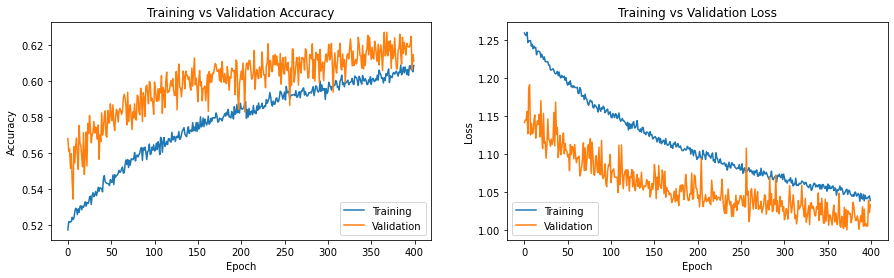

In [245]:
plot_model_accuracy(history)

## Visualize Random image going through the network


### Step by Step

In [247]:
# Pick a random image from the training set
x = random.choice(train_images)  # array with shape (48, 48, 1)
x = x.reshape((1,) + x.shape)  # reshape into (1, 48, 48, 1)

In [248]:
# save the outputs of the trained model in a list
successive_outputs = [layer.output for layer in model.layers[1:]]
successive_outputs

[<KerasTensor: shape=(None, 24, 24, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 22, 22, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 9, 9, 128) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 4, 4, 128) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 2, 2, 256) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 1, 1, 256) dtype=float32 (created by layer 'max_pooling2d_3')>,
 <KerasTensor: shape=(None, 1, 1, 256) dtype=float32 (created by layer 'dropout')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense_1')>,
 <KerasTensor: shape=(None, 7) dtype=float32 (created by lay

In [249]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers from the previously trained model 
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

In [250]:
type(visualization_model)

keras.engine.functional.Functional

In [251]:
# Run the image through the network to get intermediate representations
successive_feature_maps = visualization_model.predict(x)
successive_feature_maps

2022-05-14 19:55:14.428160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[array([[[[8.7258555e-03, 5.4330281e-03, 0.0000000e+00, ...,
           0.0000000e+00, 1.7361868e-02, 9.0244412e-03],
          [8.7258555e-03, 5.4330281e-03, 0.0000000e+00, ...,
           0.0000000e+00, 1.7361868e-02, 9.0244412e-03],
          [8.7258555e-03, 5.4330281e-03, 0.0000000e+00, ...,
           0.0000000e+00, 1.7361868e-02, 9.0244412e-03],
          ...,
          [9.0025095e-03, 5.4330281e-03, 0.0000000e+00, ...,
           0.0000000e+00, 1.7361868e-02, 1.0086338e-02],
          [8.6454943e-02, 6.4502256e-03, 7.2964700e-05, ...,
           0.0000000e+00, 1.8237446e-02, 5.1098000e-02],
          [1.5169641e-01, 4.7100846e-02, 2.0815751e-01, ...,
           1.4235479e-01, 2.3633784e-01, 1.0988411e-02]],
 
         [[8.7258555e-03, 5.4330281e-03, 0.0000000e+00, ...,
           0.0000000e+00, 1.7361868e-02, 9.0244412e-03],
          [8.7258555e-03, 5.4330281e-03, 0.0000000e+00, ...,
           0.0000000e+00, 1.7361868e-02, 9.0244412e-03],
          [8.7258555e-03, 5.4330281e-0

In [198]:
# Save layer names in a list for plot titles
layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'dropout',
 'flatten',
 'dense',
 'dense_1',
 'dense_2']

In [200]:
20. / n_features*n_features

20.0

In [201]:
layer_names[0]

'conv2d'

In [202]:
for fmap in successive_feature_maps:
    print(fmap.shape)

(1, 24, 24, 32)
(1, 22, 22, 64)
(1, 11, 11, 64)
(1, 9, 9, 128)
(1, 4, 4, 128)
(1, 2, 2, 256)
(1, 1, 1, 256)
(1, 1, 1, 256)
(1, 256)
(1, 512)
(1, 256)
(1, 7)



conv2d
number of features in feature map is 32
The feature map has shape (1, size: 24 x 24, n_features: 32)
dimensions of the grid: 24,24x32=768

postprocessing the grid...
(24, 768)
scale: 4.0

Figsize = (scale(4.0) x n_features(32) = 128.0, scale(4.0)
Images per row: 8.0


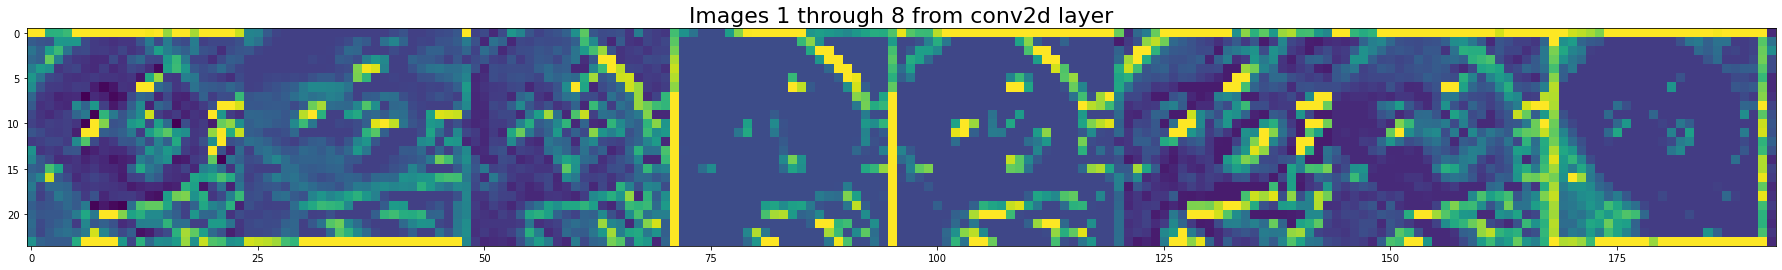

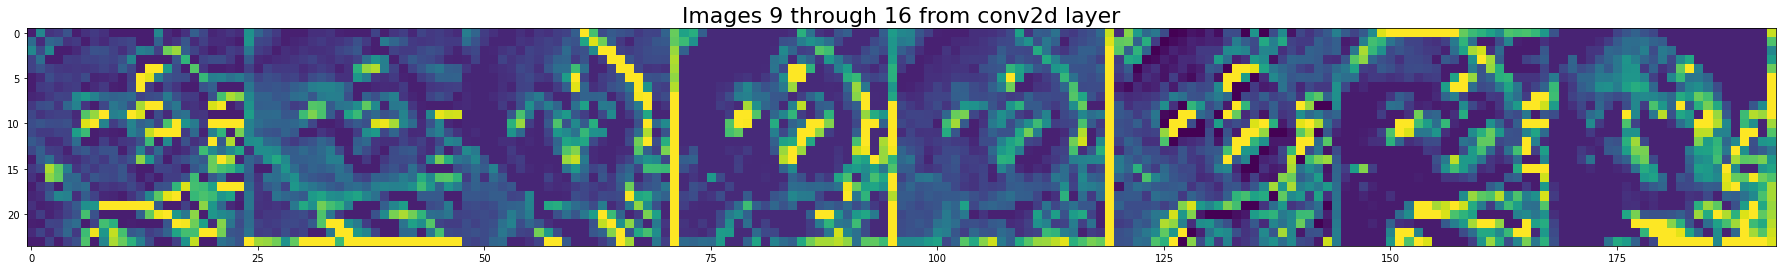

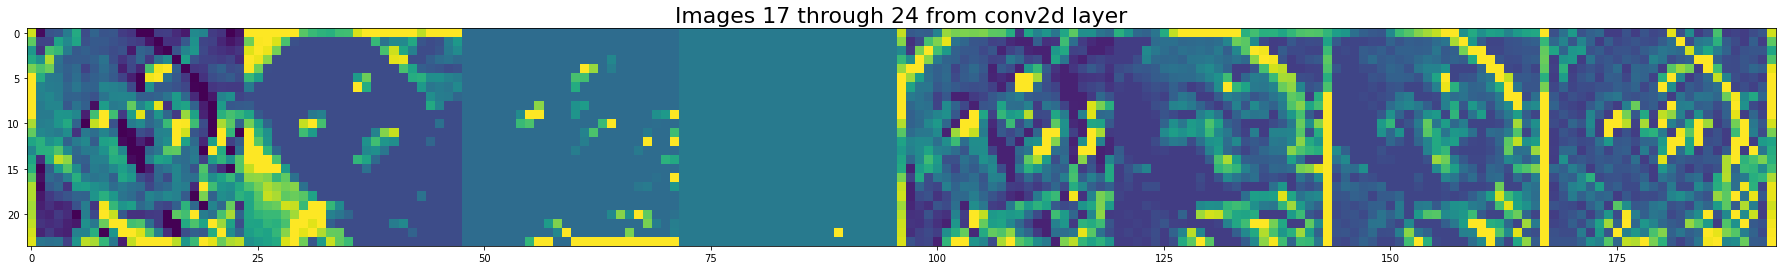

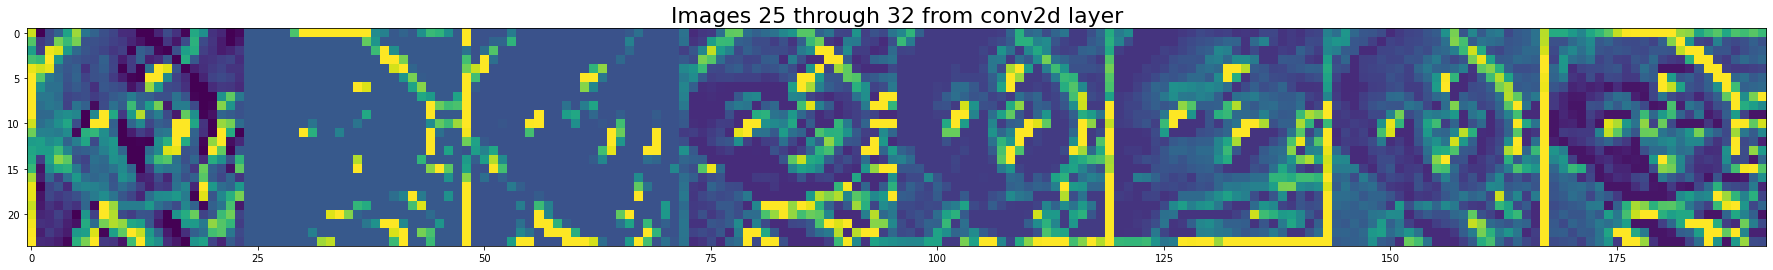

In [256]:
# start with the first convolutional layer
layer_name = layer_names[0]
feature_map = successive_feature_maps[0]
print(f'\n{layer_name}')

# A feature map has shape (1, size, size, n_features)
n_features = feature_map.shape[-1]  # number of features i
print(f'number of features in feature map is {n_features}')

size = feature_map.shape[1] # size
print(f'The feature map has shape (1, size: {size} x {size}, n_features: {n_features})')

# Tile the images in a matrix grid
display_grid = np.zeros((size, size * n_features))
print(f'dimensions of the grid: {size},{size}x{n_features}={size*n_features}')

print(f'\npostprocessing the grid...')
for i in range(n_features):
    # Postprocess the features to improve visual representation
    x = feature_map[0, :, :, i] # for each feature
    x -= x.mean() # standardize
    x /= x.std() # standardize
    x *= 64
    x += 128
    x = np.clip(x, 0, 255).astype('uint8') # limit the values in a fearure
    # fill each feature into a grid
    display_grid[:, i * size : (i + 1) * size] = x # fill the feature into a grid
print(display_grid.shape) 

scale = 128. / n_features
print(f'scale: {scale}')

print(f'\nFigsize = (scale({scale}) x n_features({n_features}) = {scale * n_features}, scale({scale})')

# Define visualization options
n_rows = 4
img_per_row = n_features / n_rows
print(f'Images per row: {img_per_row}')


start=0
stop = size*8+1
for i in range(n_rows):

    plt.figure(figsize=(scale * n_features, scale))
    plt.title(f'Images {int(start/size+1)} through {int((stop-1)/size)} from {layer_name} layer', size = 22)
    plt.grid(False)
    plt.imshow(display_grid[:,start:stop],  cmap='viridis')
    plt.show()
    start=stop-1
    stop+=size*8

### One cell

2022-05-14 20:14:19.450072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/var/folders/df/8l8v9dtn3m38r4vghbk8fp4c0000gp/T/ipykernel_96473/547980168.py:31: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std() # standardize


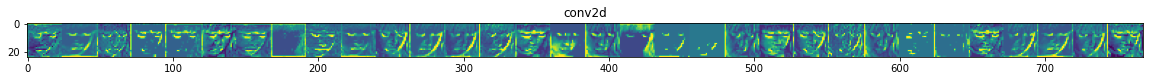

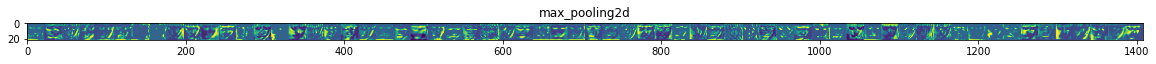

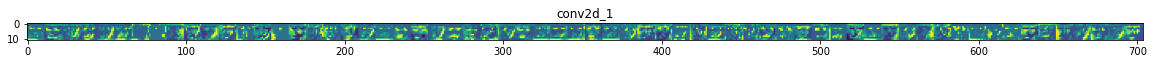

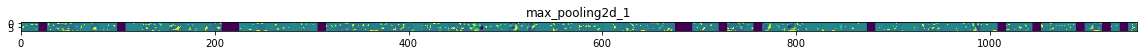

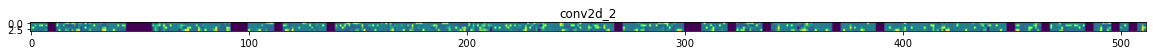

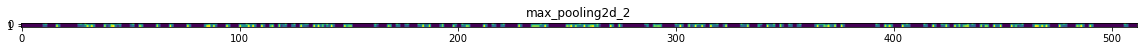

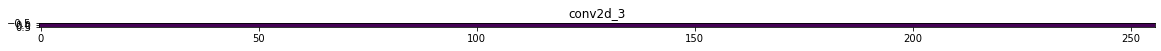

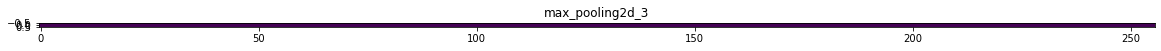

In [257]:
# Pick a random image from the training set
x = random.choice(train_images)  # array with shape (48, 48, 1)
x = x.reshape((1,) + x.shape)  # reshape into (1, 48, 48, 1)

# save the outputs of the trained model in a list
successive_outputs = [layer.output for layer in model.layers[1:]]

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers from the previously trained model 
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Run the image through the network to get intermediate representations
successive_feature_maps = visualization_model.predict(x)

# Save layer names in a list for plot titles
layer_names = [layer.name for layer in model.layers]

# Display image representation of each feature
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4: # Do not include fully-connected layers
        
        # A feature map has shape (1, size, size, n_features)
        n_features = feature_map.shape[-1]  # number of features i
        size = feature_map.shape[1] # size
        # Tile the images in a matrix grid
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # Postprocess the features to improve visual representation
            x = feature_map[0, :, :, i]
            x -= x.mean() # standardize
            x /= x.std() # standardize
            
            
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8') # limit the values in a fearure
            # fill each feature into a grid
            display_grid[:, i * size : (i + 1) * size] = x 
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Remove one Dense activation layer // Reduce dropout // lower learning rate

### LR=0.0005

In [36]:
# removed Dense layer with 512 units
mdl10_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,
                           (3,3), 
                           activation='relu', 
                           input_shape=(48, 48, 1),
                           padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

mdl10_1.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.0005),
              metrics=['accuracy'])

callbacks=myCallback()


from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'   
)

train_datagen.fit(train_images)
train_datagen = train_datagen.flow(train_images, train_labels, batch_size=1024)

valid_datagen = ImageDataGenerator()
valid_datagen = valid_datagen.flow(validation_images, validation_labels, batch_size=128)

history_mdl10_1 = mdl10_1.fit(
      train_datagen,
      validation_data = valid_datagen,  
      epochs=800,
      steps_per_epoch=28,
      validation_steps=28,
      verbose=1,
      callbacks=[callbacks])

Epoch 1/800


2022-05-16 16:20:28.971937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - ETA: 0s - loss: 1.8377 - accuracy: 0.2389

2022-05-16 16:20:36.089081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 8s 255ms/step - loss: 1.8377 - accuracy: 0.2389 - val_loss: 1.8173 - val_accuracy: 0.2494
Epoch 2/800
28/28 [==============================] - 7s 244ms/step - loss: 1.8184 - accuracy: 0.2500 - val_loss: 1.8091 - val_accuracy: 0.2489
Epoch 3/800
28/28 [==============================] - 7s 259ms/step - loss: 1.8117 - accuracy: 0.2505 - val_loss: 1.7999 - val_accuracy: 0.2542
Epoch 4/800
28/28 [==============================] - 7s 258ms/step - loss: 1.8051 - accuracy: 0.2527 - val_loss: 1.8259 - val_accuracy: 0.2489
Epoch 5/800
28/28 [==============================] - 7s 246ms/step - loss: 1.7990 - accuracy: 0.2545 - val_loss: 1.7841 - val_accuracy: 0.2575
Epoch 6/800
28/28 [==============================] - 7s 245ms/step - loss: 1.7934 - accuracy: 0.2535 - val_loss: 1.7857 - val_accuracy: 0.2589
Epoch 7/800
28/28 [==============================] - 7s 252ms/step - loss: 1.7921 - accuracy: 0.2542 - val_loss: 1.7717 - val_accuracy: 0.2584
Epoch 8/800

Epoch 58/800
28/28 [==============================] - 8s 296ms/step - loss: 1.4227 - accuracy: 0.4533 - val_loss: 1.2657 - val_accuracy: 0.5103
Epoch 59/800
28/28 [==============================] - 8s 288ms/step - loss: 1.4112 - accuracy: 0.4574 - val_loss: 1.2614 - val_accuracy: 0.5112
Epoch 60/800
28/28 [==============================] - 8s 286ms/step - loss: 1.4078 - accuracy: 0.4573 - val_loss: 1.4209 - val_accuracy: 0.4456
Epoch 61/800
28/28 [==============================] - 8s 276ms/step - loss: 1.4079 - accuracy: 0.4569 - val_loss: 1.2453 - val_accuracy: 0.5176
Epoch 62/800
28/28 [==============================] - 8s 275ms/step - loss: 1.3953 - accuracy: 0.4637 - val_loss: 1.2266 - val_accuracy: 0.5366
Epoch 63/800
28/28 [==============================] - 8s 273ms/step - loss: 1.3941 - accuracy: 0.4662 - val_loss: 1.2081 - val_accuracy: 0.5343
Epoch 64/800
28/28 [==============================] - 7s 262ms/step - loss: 1.3945 - accuracy: 0.4627 - val_loss: 1.2356 - val_accuracy:

Epoch 115/800
28/28 [==============================] - 7s 249ms/step - loss: 1.2612 - accuracy: 0.5212 - val_loss: 1.1386 - val_accuracy: 0.5575
Epoch 116/800
28/28 [==============================] - 7s 251ms/step - loss: 1.2512 - accuracy: 0.5217 - val_loss: 1.1169 - val_accuracy: 0.5706
Epoch 117/800
28/28 [==============================] - 7s 249ms/step - loss: 1.2507 - accuracy: 0.5210 - val_loss: 1.1196 - val_accuracy: 0.5720
Epoch 118/800
28/28 [==============================] - 7s 254ms/step - loss: 1.2560 - accuracy: 0.5226 - val_loss: 1.1054 - val_accuracy: 0.5723
Epoch 119/800
28/28 [==============================] - 7s 258ms/step - loss: 1.2443 - accuracy: 0.5299 - val_loss: 1.1225 - val_accuracy: 0.5639
Epoch 120/800
28/28 [==============================] - 7s 261ms/step - loss: 1.2492 - accuracy: 0.5224 - val_loss: 1.1688 - val_accuracy: 0.5499
Epoch 121/800
28/28 [==============================] - 7s 249ms/step - loss: 1.2455 - accuracy: 0.5262 - val_loss: 1.1454 - val_ac

28/28 [==============================] - 7s 258ms/step - loss: 1.2020 - accuracy: 0.5460 - val_loss: 1.1405 - val_accuracy: 0.5692
Epoch 172/800
28/28 [==============================] - 8s 282ms/step - loss: 1.1873 - accuracy: 0.5484 - val_loss: 1.1064 - val_accuracy: 0.5773
Epoch 173/800
28/28 [==============================] - 8s 261ms/step - loss: 1.1953 - accuracy: 0.5453 - val_loss: 1.0980 - val_accuracy: 0.5854
Epoch 174/800
28/28 [==============================] - 7s 256ms/step - loss: 1.1897 - accuracy: 0.5502 - val_loss: 1.0911 - val_accuracy: 0.5873
Epoch 175/800
28/28 [==============================] - 7s 255ms/step - loss: 1.1825 - accuracy: 0.5503 - val_loss: 1.0716 - val_accuracy: 0.5893
Epoch 176/800
28/28 [==============================] - 7s 250ms/step - loss: 1.1881 - accuracy: 0.5464 - val_loss: 1.0748 - val_accuracy: 0.5815
Epoch 177/800
28/28 [==============================] - 7s 251ms/step - loss: 1.1862 - accuracy: 0.5490 - val_loss: 1.1305 - val_accuracy: 0.5700

28/28 [==============================] - 7s 243ms/step - loss: 1.1423 - accuracy: 0.5691 - val_loss: 1.0705 - val_accuracy: 0.5929
Epoch 228/800
28/28 [==============================] - 7s 245ms/step - loss: 1.1507 - accuracy: 0.5626 - val_loss: 1.0344 - val_accuracy: 0.6083
Epoch 229/800
28/28 [==============================] - 7s 248ms/step - loss: 1.1545 - accuracy: 0.5604 - val_loss: 1.0495 - val_accuracy: 0.6085
Epoch 230/800
28/28 [==============================] - 7s 247ms/step - loss: 1.1420 - accuracy: 0.5662 - val_loss: 1.0691 - val_accuracy: 0.5946
Epoch 231/800
28/28 [==============================] - 7s 247ms/step - loss: 1.1416 - accuracy: 0.5643 - val_loss: 1.0915 - val_accuracy: 0.5834
Epoch 232/800
28/28 [==============================] - 7s 246ms/step - loss: 1.1454 - accuracy: 0.5637 - val_loss: 1.0517 - val_accuracy: 0.6007
Epoch 233/800
28/28 [==============================] - 7s 255ms/step - loss: 1.1428 - accuracy: 0.5645 - val_loss: 1.0737 - val_accuracy: 0.5921

28/28 [==============================] - 8s 280ms/step - loss: 1.1265 - accuracy: 0.5734 - val_loss: 1.0150 - val_accuracy: 0.6166
Epoch 284/800
28/28 [==============================] - 7s 247ms/step - loss: 1.1196 - accuracy: 0.5754 - val_loss: 1.0409 - val_accuracy: 0.6088
Epoch 285/800
28/28 [==============================] - 7s 246ms/step - loss: 1.1092 - accuracy: 0.5787 - val_loss: 1.0227 - val_accuracy: 0.6161
Epoch 286/800
28/28 [==============================] - 7s 249ms/step - loss: 1.1109 - accuracy: 0.5814 - val_loss: 1.0444 - val_accuracy: 0.6161
Epoch 287/800
28/28 [==============================] - 7s 251ms/step - loss: 1.1222 - accuracy: 0.5720 - val_loss: 1.0204 - val_accuracy: 0.6166
Epoch 288/800
28/28 [==============================] - 7s 251ms/step - loss: 1.1141 - accuracy: 0.5798 - val_loss: 1.0679 - val_accuracy: 0.5898
Epoch 289/800
28/28 [==============================] - 7s 256ms/step - loss: 1.1099 - accuracy: 0.5770 - val_loss: 1.0992 - val_accuracy: 0.5776

28/28 [==============================] - 7s 247ms/step - loss: 1.0873 - accuracy: 0.5873 - val_loss: 1.0490 - val_accuracy: 0.5993
Epoch 340/800
28/28 [==============================] - 8s 266ms/step - loss: 1.0866 - accuracy: 0.5873 - val_loss: 1.0052 - val_accuracy: 0.6133
Epoch 341/800
28/28 [==============================] - 7s 250ms/step - loss: 1.0934 - accuracy: 0.5879 - val_loss: 1.0100 - val_accuracy: 0.6119
Epoch 342/800
28/28 [==============================] - 7s 248ms/step - loss: 1.0833 - accuracy: 0.5870 - val_loss: 1.0551 - val_accuracy: 0.6057
Epoch 343/800
28/28 [==============================] - 7s 252ms/step - loss: 1.0945 - accuracy: 0.5865 - val_loss: 1.0326 - val_accuracy: 0.6091
Epoch 344/800
28/28 [==============================] - 7s 254ms/step - loss: 1.0874 - accuracy: 0.5878 - val_loss: 1.0340 - val_accuracy: 0.6088
Epoch 345/800
28/28 [==============================] - 7s 256ms/step - loss: 1.0917 - accuracy: 0.5852 - val_loss: 1.0383 - val_accuracy: 0.6083

28/28 [==============================] - 7s 249ms/step - loss: 1.0765 - accuracy: 0.5963 - val_loss: 1.0319 - val_accuracy: 0.6124
Epoch 396/800
28/28 [==============================] - 7s 251ms/step - loss: 1.0667 - accuracy: 0.5961 - val_loss: 1.0117 - val_accuracy: 0.6169
Epoch 397/800
28/28 [==============================] - 7s 252ms/step - loss: 1.0756 - accuracy: 0.5917 - val_loss: 1.0128 - val_accuracy: 0.6158
Epoch 398/800
28/28 [==============================] - 7s 253ms/step - loss: 1.0780 - accuracy: 0.5930 - val_loss: 1.0073 - val_accuracy: 0.6197
Epoch 399/800
28/28 [==============================] - 7s 247ms/step - loss: 1.0760 - accuracy: 0.5901 - val_loss: 0.9968 - val_accuracy: 0.6300
Epoch 400/800
28/28 [==============================] - 7s 249ms/step - loss: 1.0736 - accuracy: 0.5945 - val_loss: 1.0214 - val_accuracy: 0.6138
Epoch 401/800
28/28 [==============================] - 7s 251ms/step - loss: 1.0702 - accuracy: 0.5983 - val_loss: 1.0143 - val_accuracy: 0.6197

28/28 [==============================] - 7s 253ms/step - loss: 1.0561 - accuracy: 0.5990 - val_loss: 1.0028 - val_accuracy: 0.6239
Epoch 452/800
28/28 [==============================] - 7s 252ms/step - loss: 1.0581 - accuracy: 0.6009 - val_loss: 1.0076 - val_accuracy: 0.6169
Epoch 453/800
28/28 [==============================] - 7s 255ms/step - loss: 1.0519 - accuracy: 0.6007 - val_loss: 1.0181 - val_accuracy: 0.6169
Epoch 454/800
28/28 [==============================] - 7s 252ms/step - loss: 1.0574 - accuracy: 0.6021 - val_loss: 1.0262 - val_accuracy: 0.6147
Epoch 455/800
28/28 [==============================] - 7s 253ms/step - loss: 1.0524 - accuracy: 0.6032 - val_loss: 1.0094 - val_accuracy: 0.6247
Epoch 456/800
28/28 [==============================] - 7s 254ms/step - loss: 1.0541 - accuracy: 0.6001 - val_loss: 1.0262 - val_accuracy: 0.6144
Epoch 457/800
28/28 [==============================] - 7s 251ms/step - loss: 1.0499 - accuracy: 0.6032 - val_loss: 0.9857 - val_accuracy: 0.6325

28/28 [==============================] - 7s 252ms/step - loss: 1.0400 - accuracy: 0.6045 - val_loss: 0.9782 - val_accuracy: 0.6317
Epoch 508/800
28/28 [==============================] - 7s 247ms/step - loss: 1.0380 - accuracy: 0.6068 - val_loss: 1.0263 - val_accuracy: 0.6138
Epoch 509/800
28/28 [==============================] - 7s 246ms/step - loss: 1.0447 - accuracy: 0.6052 - val_loss: 0.9889 - val_accuracy: 0.6339
Epoch 510/800
28/28 [==============================] - 7s 259ms/step - loss: 1.0391 - accuracy: 0.6044 - val_loss: 1.0023 - val_accuracy: 0.6286
Epoch 511/800
28/28 [==============================] - 8s 265ms/step - loss: 1.0364 - accuracy: 0.6083 - val_loss: 1.0174 - val_accuracy: 0.6127
Epoch 512/800
28/28 [==============================] - 7s 255ms/step - loss: 1.0335 - accuracy: 0.6108 - val_loss: 0.9940 - val_accuracy: 0.6297
Epoch 513/800
28/28 [==============================] - 7s 260ms/step - loss: 1.0445 - accuracy: 0.6071 - val_loss: 1.0015 - val_accuracy: 0.6203

28/28 [==============================] - 7s 250ms/step - loss: 1.0253 - accuracy: 0.6134 - val_loss: 1.0073 - val_accuracy: 0.6155
Epoch 564/800
28/28 [==============================] - 7s 248ms/step - loss: 1.0368 - accuracy: 0.6052 - val_loss: 0.9860 - val_accuracy: 0.6270
Epoch 565/800
28/28 [==============================] - 7s 248ms/step - loss: 1.0223 - accuracy: 0.6147 - val_loss: 0.9903 - val_accuracy: 0.6244
Epoch 566/800
28/28 [==============================] - 7s 247ms/step - loss: 1.0283 - accuracy: 0.6085 - val_loss: 0.9748 - val_accuracy: 0.6336
Epoch 567/800
28/28 [==============================] - 7s 251ms/step - loss: 1.0254 - accuracy: 0.6125 - val_loss: 1.0041 - val_accuracy: 0.6242
Epoch 568/800
28/28 [==============================] - 7s 251ms/step - loss: 1.0281 - accuracy: 0.6131 - val_loss: 1.0081 - val_accuracy: 0.6242
Epoch 569/800
28/28 [==============================] - 7s 256ms/step - loss: 1.0243 - accuracy: 0.6140 - val_loss: 0.9770 - val_accuracy: 0.6323

28/28 [==============================] - 7s 247ms/step - loss: 1.0126 - accuracy: 0.6170 - val_loss: 1.1140 - val_accuracy: 0.5859
Epoch 620/800
28/28 [==============================] - 7s 251ms/step - loss: 1.0256 - accuracy: 0.6121 - val_loss: 0.9945 - val_accuracy: 0.6306
Epoch 621/800
28/28 [==============================] - 7s 254ms/step - loss: 1.0194 - accuracy: 0.6126 - val_loss: 0.9816 - val_accuracy: 0.6381
Epoch 622/800
28/28 [==============================] - 7s 250ms/step - loss: 1.0110 - accuracy: 0.6186 - val_loss: 0.9815 - val_accuracy: 0.6283
Epoch 623/800
28/28 [==============================] - 7s 250ms/step - loss: 1.0122 - accuracy: 0.6207 - val_loss: 0.9873 - val_accuracy: 0.6283
Epoch 624/800
28/28 [==============================] - 7s 250ms/step - loss: 1.0169 - accuracy: 0.6171 - val_loss: 0.9874 - val_accuracy: 0.6281
Epoch 625/800
28/28 [==============================] - 7s 249ms/step - loss: 1.0214 - accuracy: 0.6110 - val_loss: 0.9873 - val_accuracy: 0.6217

28/28 [==============================] - 7s 254ms/step - loss: 1.0084 - accuracy: 0.6183 - val_loss: 0.9763 - val_accuracy: 0.6350
Epoch 676/800
28/28 [==============================] - 8s 273ms/step - loss: 1.0092 - accuracy: 0.6185 - val_loss: 0.9832 - val_accuracy: 0.6342
Epoch 677/800
28/28 [==============================] - 7s 259ms/step - loss: 1.0039 - accuracy: 0.6169 - val_loss: 0.9748 - val_accuracy: 0.6356
Epoch 678/800
28/28 [==============================] - 7s 249ms/step - loss: 1.0010 - accuracy: 0.6201 - val_loss: 0.9747 - val_accuracy: 0.6362
Epoch 679/800
28/28 [==============================] - 7s 264ms/step - loss: 1.0065 - accuracy: 0.6190 - val_loss: 0.9638 - val_accuracy: 0.6412
Epoch 680/800
28/28 [==============================] - 7s 254ms/step - loss: 1.0031 - accuracy: 0.6199 - val_loss: 0.9744 - val_accuracy: 0.6339
Epoch 681/800
28/28 [==============================] - 7s 258ms/step - loss: 1.0031 - accuracy: 0.6207 - val_loss: 0.9813 - val_accuracy: 0.6286

28/28 [==============================] - 7s 250ms/step - loss: 0.9979 - accuracy: 0.6242 - val_loss: 0.9631 - val_accuracy: 0.6392
Epoch 732/800
28/28 [==============================] - 7s 261ms/step - loss: 1.0006 - accuracy: 0.6217 - val_loss: 0.9795 - val_accuracy: 0.6283
Epoch 733/800
28/28 [==============================] - 7s 246ms/step - loss: 1.0029 - accuracy: 0.6228 - val_loss: 0.9734 - val_accuracy: 0.6336
Epoch 734/800
28/28 [==============================] - 7s 252ms/step - loss: 0.9986 - accuracy: 0.6213 - val_loss: 0.9739 - val_accuracy: 0.6364
Epoch 735/800
28/28 [==============================] - 7s 254ms/step - loss: 0.9893 - accuracy: 0.6256 - val_loss: 0.9814 - val_accuracy: 0.6306
Epoch 736/800
28/28 [==============================] - 7s 252ms/step - loss: 0.9974 - accuracy: 0.6208 - val_loss: 0.9643 - val_accuracy: 0.6359
Epoch 737/800
28/28 [==============================] - 7s 250ms/step - loss: 0.9964 - accuracy: 0.6204 - val_loss: 0.9658 - val_accuracy: 0.6367

28/28 [==============================] - 7s 251ms/step - loss: 0.9896 - accuracy: 0.6226 - val_loss: 0.9688 - val_accuracy: 0.6362
Epoch 788/800
28/28 [==============================] - 7s 251ms/step - loss: 0.9860 - accuracy: 0.6267 - val_loss: 0.9716 - val_accuracy: 0.6325
Epoch 789/800
28/28 [==============================] - 8s 264ms/step - loss: 0.9817 - accuracy: 0.6273 - val_loss: 0.9643 - val_accuracy: 0.6440
Epoch 790/800
28/28 [==============================] - 8s 272ms/step - loss: 0.9826 - accuracy: 0.6275 - val_loss: 0.9602 - val_accuracy: 0.6431
Epoch 791/800
28/28 [==============================] - 8s 263ms/step - loss: 0.9879 - accuracy: 0.6283 - val_loss: 0.9617 - val_accuracy: 0.6429
Epoch 792/800
28/28 [==============================] - 7s 257ms/step - loss: 0.9922 - accuracy: 0.6228 - val_loss: 0.9660 - val_accuracy: 0.6398
Epoch 793/800
28/28 [==============================] - 7s 257ms/step - loss: 0.9904 - accuracy: 0.6250 - val_loss: 0.9672 - val_accuracy: 0.6356

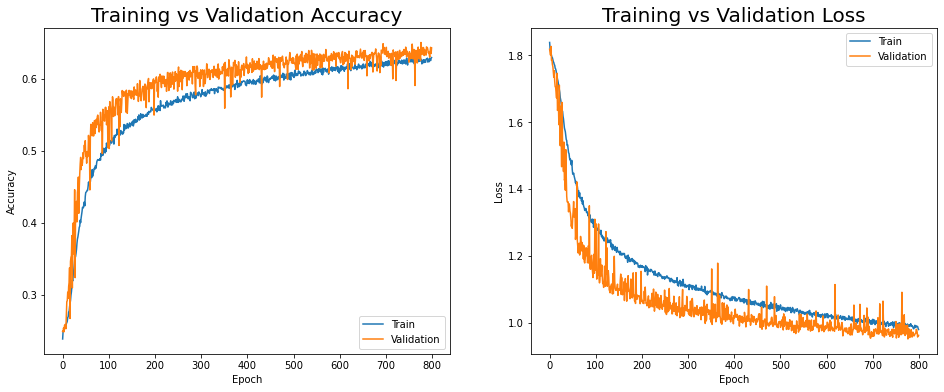

In [38]:
fig , ax = plt.subplots(1,2)
train_acc = history_mdl10_1.history['accuracy']
train_loss = history_mdl10_1.history['loss']
fig.set_size_inches(16,6)

ax[0].plot(history_mdl10_1.history['accuracy'])
ax[0].plot(history_mdl10_1.history['val_accuracy'])
ax[0].set_title('Training vs Validation Accuracy', size=20)
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='lower right')

ax[1].plot(history_mdl10_1.history['loss'])
ax[1].plot(history_mdl10_1.history['val_loss'])
ax[1].set_title('Training vs Validation Loss', size=20)
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper right')

plt.show()

In [40]:
mdl10_1.save('../../../project_data/800_epochs.h5')

In [41]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = mdl10_1.evaluate(test_images, test_labels, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data


2022-05-17 09:30:59.071076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 1s 17ms/step - loss: 0.9257 - accuracy: 0.6411
test loss, test acc: [0.9256783127784729, 0.6411256790161133]


In [42]:
predicted_labels = mdl10_1.predict(test_images)

2022-05-17 09:34:29.651401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [50]:
df_pred = pd.DataFrame()
df_pred['true'] = test_labels
df_pred['pred'] = predicted_labels.argmax(axis=1)
df_pred['wrong'] = np.where(df_pred['true']!=df_pred['pred'], 1, 0)

In [54]:
df_pred.wrong.value_counts(normalize=True)

0    0.641126
1    0.358874
Name: wrong, dtype: float64

In [137]:
# from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# # confusion matrix with actual label names
# cm_labels = confusion_matrix(test_labels, predicted_labels.argmax(axis=1))
# # normalizing the values
# cm_labels_norm = cm_labels.astype('float') / cm_labels.sum(axis=1)[:, np.newaxis]
# cm_labels_norm = cm_labels_norm * 100.00

# cmd_obj = ConfusionMatrixDisplay(
#     cm_labels_norm, 
#     display_labels=[i for i in emotions.values()]
# )
# fig, ax = plt.subplots(figsize=(9,9))
# cmd_obj.plot(ax=ax, 
#              cmap = 'Greens',    
#              colorbar=False)##include_values=False)#hiding original values

# cmd_obj.ax_.set(title = 'Test Accuracy Score: {0}%\n'.format("%.2f" % (results[1]*100.0)),)
# cmd_obj.ax_.title.set_size(24)

# # 
# # thresh = cm_labels_norm.max() / 2.
# # for i, j in itertools.product(range(cm_labels_norm.shape[0]), range(cm_labels_norm.shape[1])):
# #     plt.text(j, i, format(cm_labels_norm[i, j], '.1f'),
# #              horizontalalignment="center",
# #              color="white" if cm_labels_norm[i, j] > thresh else "black")

# plt.tight_layout()
# plt.xticks(size=16)
# plt.yticks(size=16)
# plt.ylabel('Actual label', size=18)
# plt.xlabel('Predicted label', size=18)

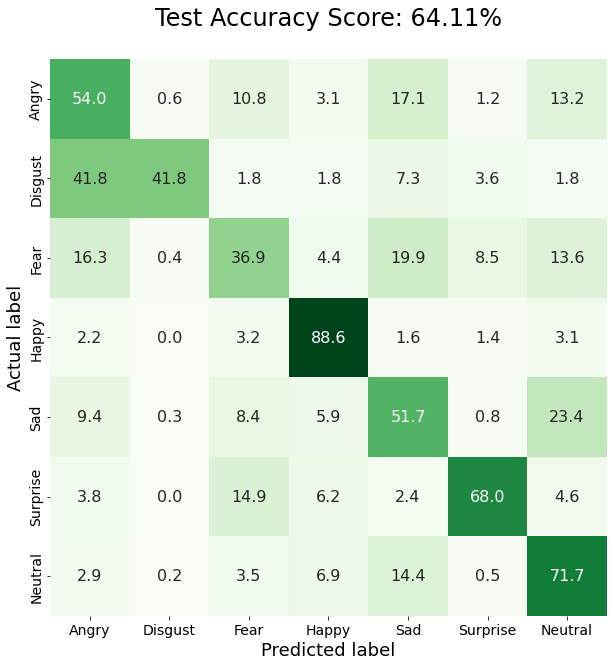

In [142]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrix with actual label names
cm_labels = confusion_matrix(test_labels, predicted_labels.argmax(axis=1))
# normalizing the values
cm_labels_norm = cm_labels.astype('float') / cm_labels.sum(axis=1)[:, np.newaxis]
cm_labels_norm = cm_labels_norm * 100.00

plt.figure(figsize=(9,9))
sns.heatmap(cm_labels_norm,
            annot=True, 
            annot_kws={'size':16},
            fmt=".1f",
           cmap='Greens',
           xticklabels=[i for i in emotions.values()],
           yticklabels=[i for i in emotions.values()],
           square=True,
           cbar=False)
plt.title('Test Accuracy Score: {0}%\n'.format("%.2f" % (results[1]*100.0)), size=24)
plt.tight_layout()
plt.xticks(size=14)
plt.yticks(size=14)
plt.ylabel('Actual label', size=18)
plt.xlabel('Predicted label', size=18)
plt.show()